In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline 
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
import re
from keras.preprocessing import sequence
from keras.preprocessing.text import one_hot
from keras.preprocessing.text import text_to_word_sequence
from sklearn.svm import LinearSVC

In [8]:
dataset=pd.read_csv('C:/Users/dell/Desktop/Web URL/URL Classification.csv', header = None)

In [9]:
dataset.shape

(1562978, 3)

In [10]:
dataset.head()

,0,1,2
0,1,http://www.liquidgeneration.com/,Adult
1,2,http://www.onlineanime.org/,Adult
2,3,http://www.ceres.dti.ne.jp/~nekoi/senno/senfir...,Adult
3,4,http://www.galeon.com/kmh/,Adult
4,5,http://www.fanworkrecs.com/,Adult


### We can see that the csv file has no headings. Lets add the URL and Category as headings to the data

In [11]:
column_names = ['ID', 'URL', 'Category']
dataset.columns = column_names

In [12]:
dataset.head()

,ID,URL,Category
0,1,http://www.liquidgeneration.com/,Adult
1,2,http://www.onlineanime.org/,Adult
2,3,http://www.ceres.dti.ne.jp/~nekoi/senno/senfir...,Adult
3,4,http://www.galeon.com/kmh/,Adult
4,5,http://www.fanworkrecs.com/,Adult


In [14]:

adult = dataset[0:2000]
arts = dataset[50000:52000]
business = dataset[520000:522000]
computers = dataset[535300:537300]
games = dataset[650000:652000]
health = dataset[710000:712000]
home =  dataset[764200:766200]
kids =  dataset[793080:795080]
news =  dataset[839730:841730]
recreation =  dataset[850000:852000]
reference =  dataset[955250:957250]
science =  dataset[1013000:1015000]
shopping =  dataset[1143000:1145000]
society =  dataset[1293000:1295000]
sports =  dataset[1492000:1494000]

test_data = pd.concat([adult, arts, business, computers, games, health, home, 
              kids, news, recreation, reference,science, shopping, society, sports], axis=0)

dataset.drop(dataset.index[0:2000],inplace= True)
dataset.drop(dataset.index[50000:52000],inplace= True)
dataset.drop(dataset.index[520000:522000],inplace= True)
dataset.drop(dataset.index[535300:537300],inplace= True)
dataset.drop(dataset.index[650000:652000],inplace= True)
dataset.drop(dataset.index[710000:712000],inplace= True)
dataset.drop(dataset.index[764200:766200],inplace= True)
dataset.drop(dataset.index[793080:795080],inplace= True)
dataset.drop(dataset.index[839730:841730],inplace= True)
dataset.drop(dataset.index[850000:852000],inplace= True)
dataset.drop(dataset.index[955250:957250],inplace= True)
dataset.drop(dataset.index[1013000:1015000],inplace= True)
dataset.drop(dataset.index[1143000:1145000],inplace= True)
dataset.drop(dataset.index[1293000:1295000],inplace= True)
dataset.drop(dataset.index[1492000:1494000],inplace= True)
dataset.tail()

,ID,URL,Category
1562973,1562974,http://www.maxpreps.com/,Sports
1562974,1562975,http://www.myscore.com/,Sports
1562975,1562976,http://sportsillustrated.cnn.com/highschool,Sports
1562976,1562977,http://rss.cnn.com/rss/si_highschool?format=xml,Sports
1562977,1562978,http://www.usatoday.com/sports/preps/,Sports


In [15]:
print(dataset.shape)
print(test_data.shape)
dataset[0:1]

(1532978, 3)
(30000, 3)


,ID,URL,Category
2000,2001,http://www.loony-archivist.com/ptcarchive/,Adult


,ID,URL,Category
2000,2001,http://www.loony-archivist.com/ptcarchive/,Adult
2001,2002,http://www.angelfire.com/bc/jojosworld/voyager...,Adult


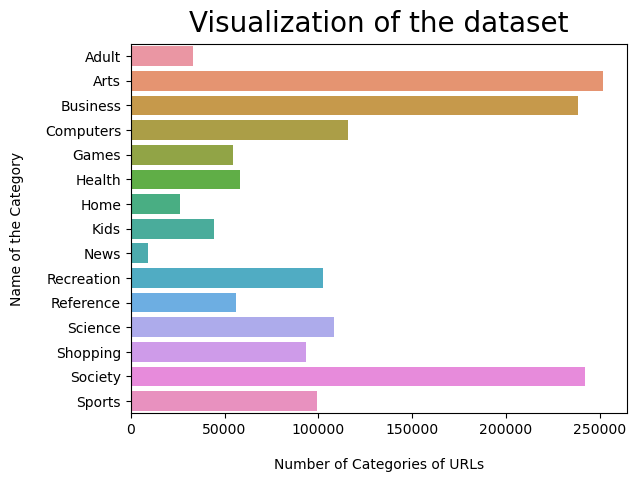

In [18]:
import seaborn as sns
ax = sns.countplot(y="Category",  data=dataset )
plt.title("Visualization of the dataset", y=1.01, fontsize=20)
plt.ylabel("Name of the Category", labelpad=15)
plt.xlabel("Number of Categories of URLs", labelpad=15)
dataset[:2]

Text(0.5, 0, 'Number of Categories of URLs')

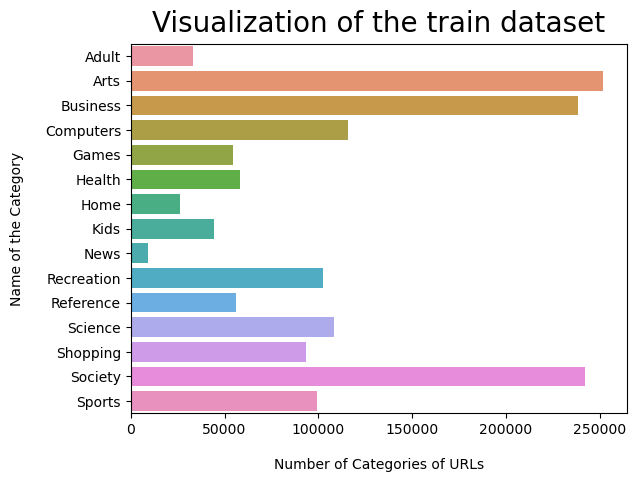

In [22]:
ax = sns.countplot(y = "Category",  data = dataset )
plt.title("Visualization of the train dataset", y=1.01, fontsize=20)
plt.ylabel("Name of the Category", labelpad=15)
plt.xlabel("Number of Categories of URLs", labelpad=15)

Text(0.5, 0, 'Number of Categories of URLs')

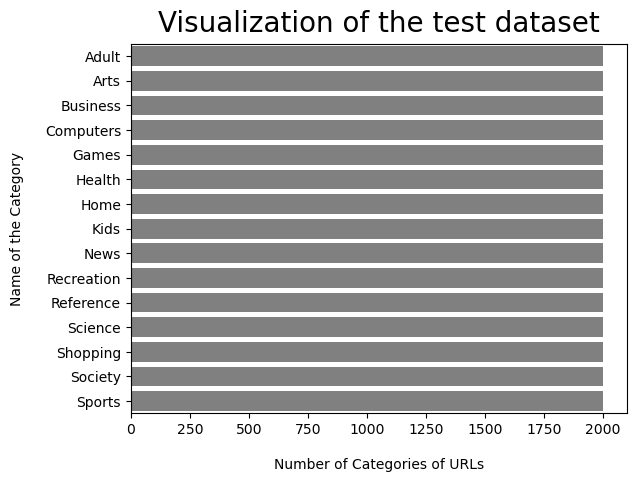

In [21]:
ax = sns.countplot(y = "Category",  data = test_data , color = 'gray')
plt.title("Visualization of the test dataset", y=1.01, fontsize=20)
plt.ylabel("Name of the Category", labelpad=15)
plt.xlabel("Number of Categories of URLs", labelpad=15)

In [23]:
X_train=dataset['URL']
y_train=dataset['Category']
#print(X_train)
X_train.shape

(1532978,)

In [24]:
X_test=test_data['URL']
y_test=test_data['Category']
#print(X_test)
X_test.shape

(30000,)

In [47]:
from sklearn.pipeline import Pipeline
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

ngrams = [(1,1), (2,2), (3,3)]

for ngram in ngrams:
    stemmed_count_vect = CountVectorizer(stop_words='english', ngram_range=ngram)
    gs_clf = Pipeline([('vect', stemmed_count_vect),
                       ('tfidf', TfidfTransformer()),
                       ('clf', MultinomialNB(fit_prior=False, alpha = 0.0001)),
       ])
    gs_clf = gs_clf.fit(X_train.astype('U').values, y_train.astype('U').values)
    y_pred = gs_clf.predict(X_test.astype('U'))
    
    # Calculate precision, recall, and F1-score
    precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    
    # Print the results
    print(f"N-gram range {ngram}:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {fscore:.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


N-gram range (1, 1):
Precision: 0.8848
Recall: 0.8804
F1-Score: 0.8679
Confusion Matrix:
[[ 445  485   12   70   52   14   38   35   20  302   36   18  379   76
    18]
 [   1 1648    5   10    1    4   18  141    1    5   61   57    3   39
     6]
 [   9    4 1867   15    6    8    5    8    7   19   21    9   11    6
     5]
 [   6    2   22 1808   13   15   18   13    9    6   37   25   10   10
     6]
 [   5    1    7   12 1889    1    2    8    3   12   26   10    7    8
     9]
 [   6    1    1    2    1 1947    4    3    1    7    7   12    3    3
     2]
 [   2    4    3   38    6    6 1897    7    7    8    6    4    9    2
     1]
 [   7  183    1   17   48    2   13 1694    2    3   19    3    2    5
     1]
 [   5    2    0    2    1    2    3    1 1927    0   42    7    0    5
     3]
 [   7    1    1    6    5    1   21    6    1 1926    9    3    6    3
     4]
 [   3    9    5   12    3    4   13   20    7    2 1876   30    1   10
     5]
 [   1    1    6    0    0    9

MemoryError: Unable to allocate 325. MiB for an array with shape (15, 2841749) and data type float64

In [30]:
#from sklearn.metrics import precision_recall_fscore_support
#from sklearn.metrics import confusion_matrix
#grid_mean_scores = [result.mean_validation_score for result in gs_clf.grid_scores_]
#print(grid_mean_scores)
#y_pred=gs_clf.predict(X_test)
#precision_recall_fscore_support(y_test, y_pred, average='weighted')

(0.9553652027591916, 0.9516333333333333, 0.9492236655204116, None)

In [31]:
#y_pred=gs_clf.predict(X_test)
#from sklearn.metrics import classification_report
#print(classification_report(y_test, y_pred, digits = 4))

              precision    recall  f1-score   support

       Adult     0.9872    0.5780    0.7291      2000
        Arts     0.7715    0.9150    0.8371      2000
    Business     0.9880    0.9890    0.9885      2000
   Computers     0.9801    0.9850    0.9825      2000
       Games     0.9721    0.9940    0.9829      2000
      Health     0.9910    0.9960    0.9935      2000
        Home     0.9609    0.9945    0.9774      2000
        Kids     0.9452    0.9230    0.9340      2000
        News     0.9866    0.9935    0.9900      2000
  Recreation     0.8794    0.9920    0.9323      2000
   Reference     0.9468    0.9785    0.9624      2000
     Science     0.9772    0.9645    0.9708      2000
    Shopping     0.9833    0.9985    0.9908      2000
     Society     0.9708    0.9970    0.9837      2000
      Sports     0.9904    0.9760    0.9831      2000

    accuracy                         0.9516     30000
   macro avg     0.9554    0.9516    0.9492     30000
weighted avg     0.9554   

<Axes: >

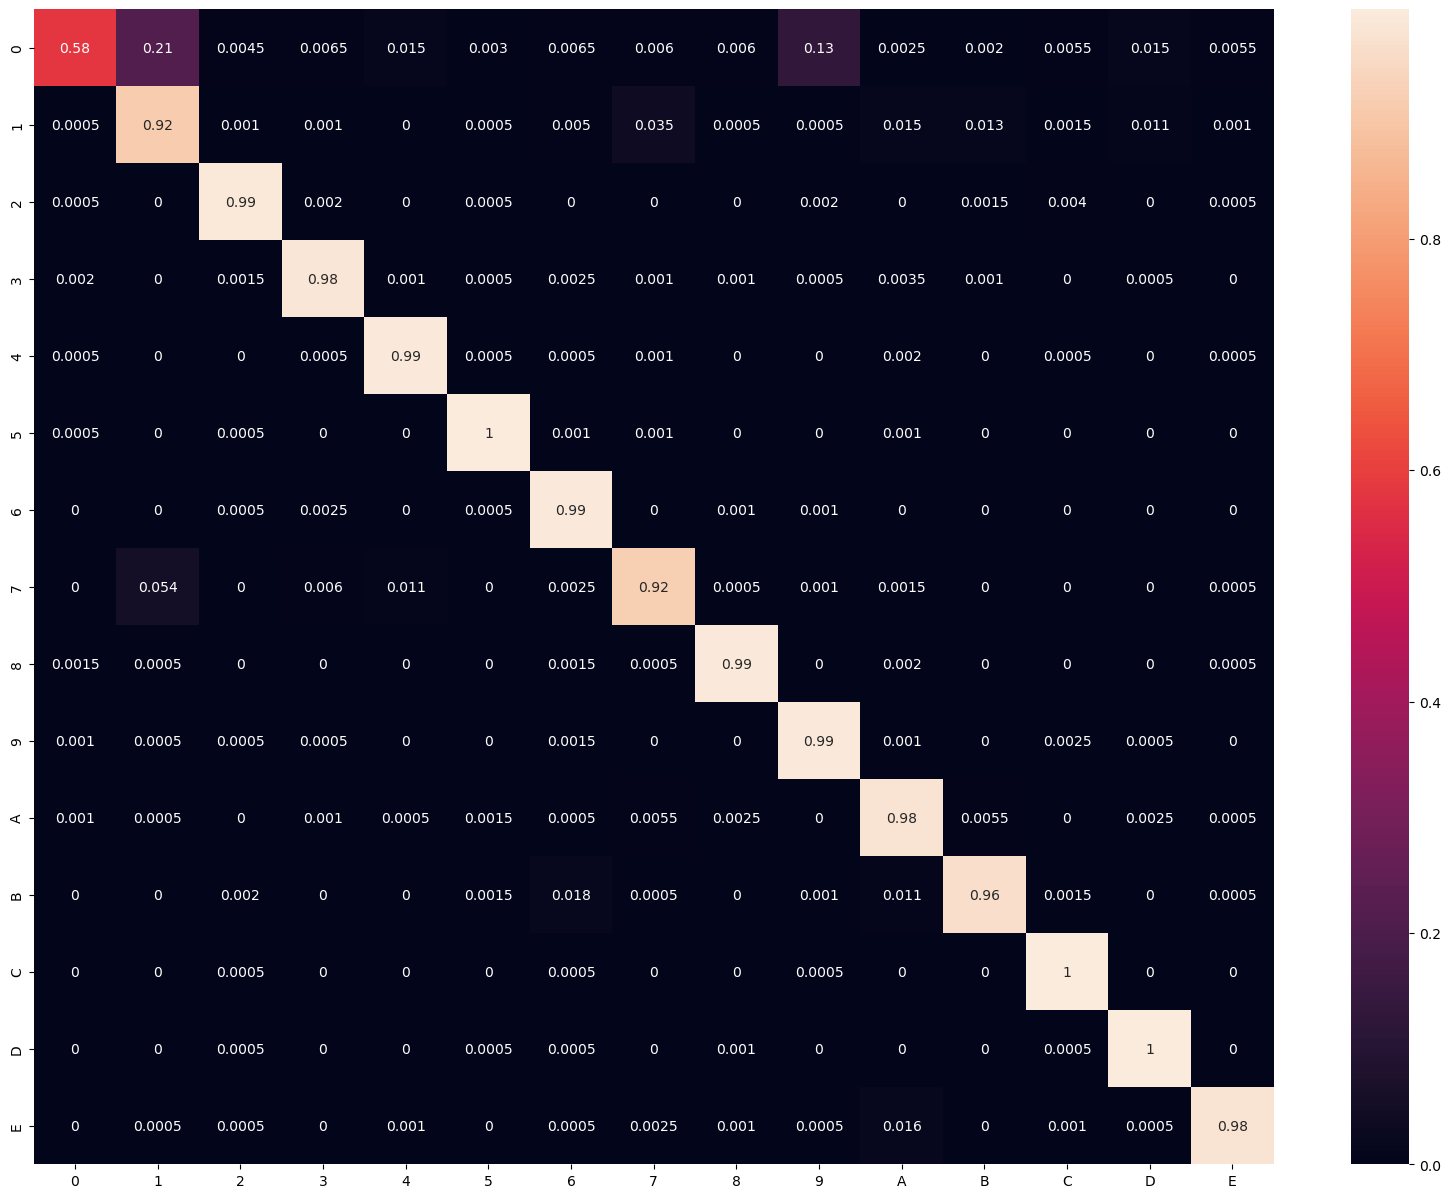

In [32]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
array = confusion_matrix(y_test, y_pred)
cm=np.array(array)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789ABCDE"],
                  columns = [i for i in "0123456789ABCDE"])
plt.figure(figsize = (20,15))
sn.heatmap(df_cm, annot=True)

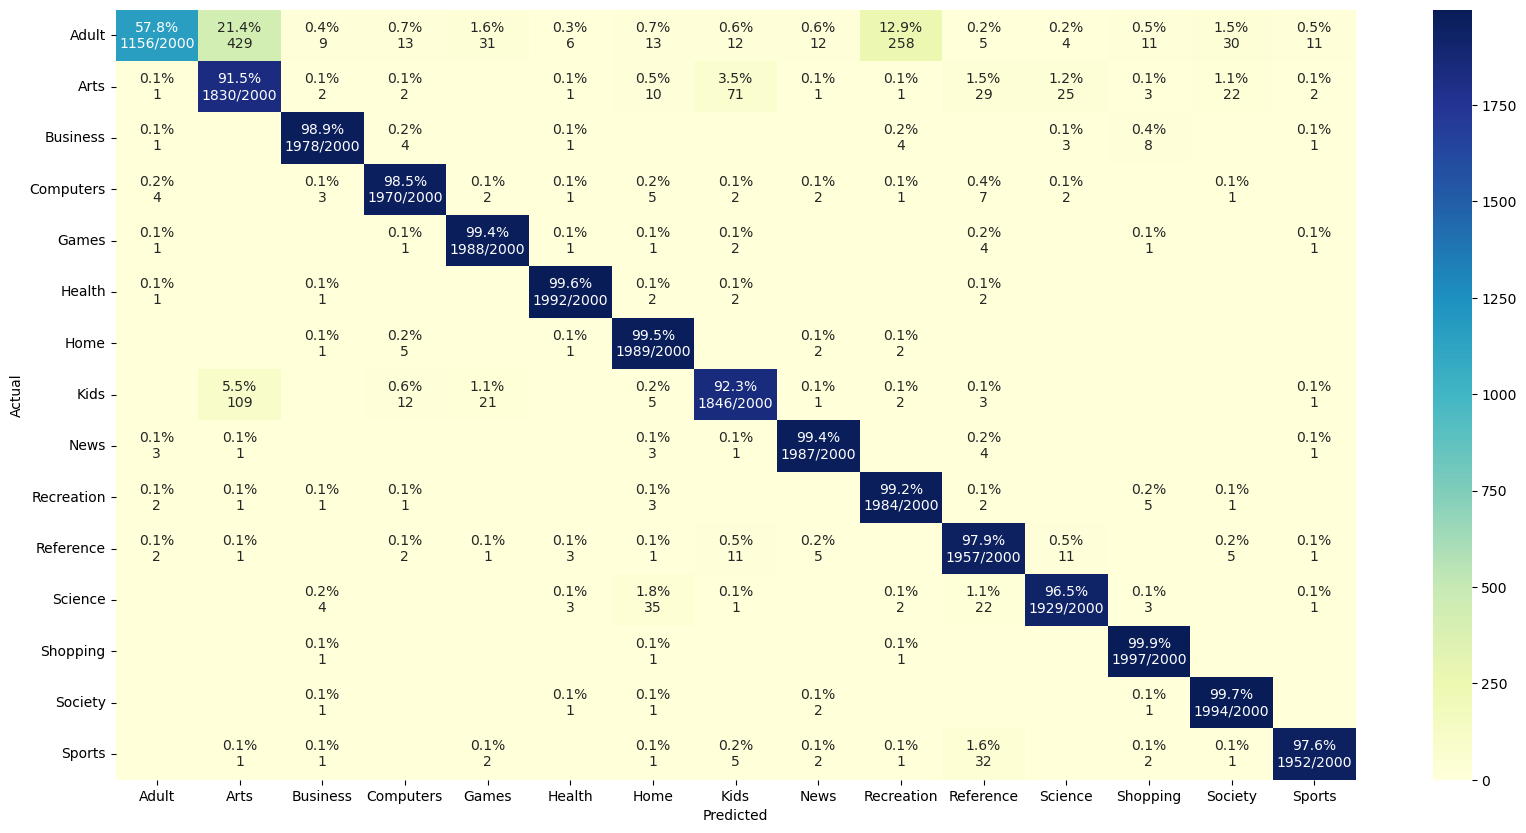

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, figsize=(20,10)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

plot_cm(y_test, y_pred)

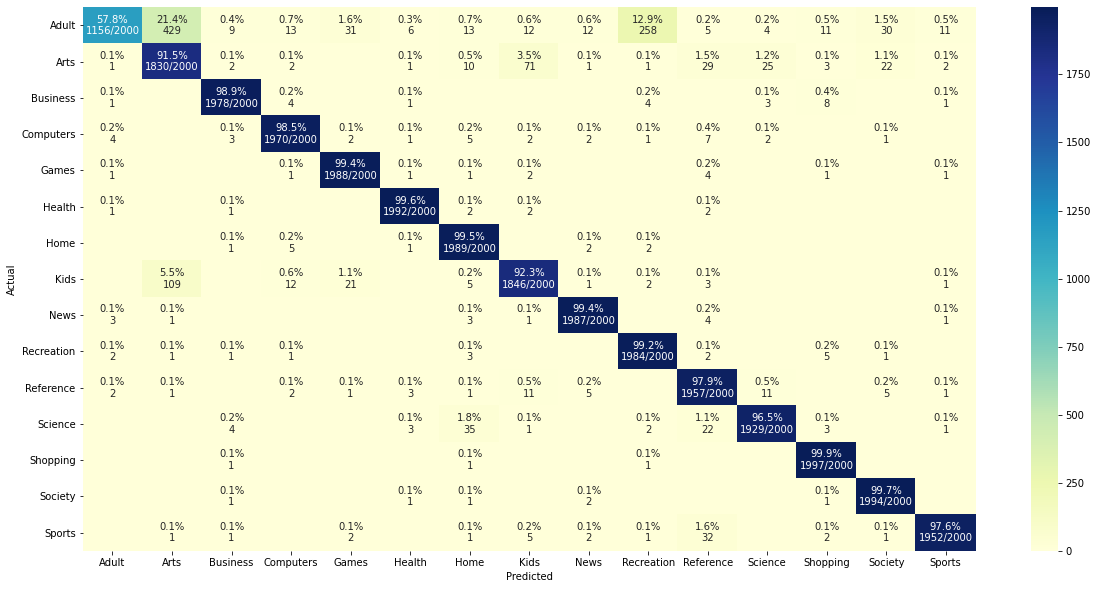

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def print_confusion_matrix(confusion_matrix, class_names, figsize = (20,10), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

plot_cm(y_test, y_pred)

In [36]:
import sklearn.metrics as metrics
print('Naive Bayes Train Accuracy = ',metrics.accuracy_score(y_train,gs_clf.predict(X_train.astype('U').values)))
print('Naive Bayes Test Accuracy = ',metrics.accuracy_score(y_test,gs_clf.predict(X_test.astype('U').values)))

Naive Bayes Train Accuracy =  0.9719513261116598
Naive Bayes Test Accuracy =  0.9516333333333333


In [37]:
print(gs_clf.predict(['https://chatgpt.com/']))
print(gs_clf.predict(['https://maps.google.com/']))

['Adult']
['Reference']


## ChatGPT is ADULT !!!

In [43]:
import tensorflow as tf
import pickle

# save the model to disk
filename = 'nvb(3,3).sav'
#pickle.dump(gs_clf, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open('C:/Users/dell/Desktop/Web URL/'+filename, 'rb'))
result = loaded_model.score(X_test, y_test)
result

0.9516333333333333